<h1> Procesamiento de las imágenes </h1>



Para el procesamiento de las imagenes, el primer paso es leerlas de la carpeta correspondiente, la cual se encuentra en la carpeta srcImg, por lo tanto:

# Librerias en general

Filtros para detectar vidrio
2.- transformada de hough para recortar el centro para lineas verticales
Filtro de gabor 
1.- hacer pruebas con imagenes recortadas a solo la pecera para ver su procesamiento e histogramas 
busqueda de contornos


In [3]:
"""
Biblioteca:
-   cv2             Manejo de imágenes
-   numpy           Manejo de arreglos de pixeles
(Prueba)-   cv2_imshow      Parche para mostrar imágenes en Colab

-   time            Biblioteca para debuggear
-   matplotlib      Manejo de las impresiones de imagenes
"""
%matplotlib inline

import os
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow

import time 
from matplotlib import pyplot as plt

# Dirección principal
dir = "c:/Users/jose_/Desktop/Tesis/Programa"
# Direccion de guardado de imágenes
outDir = os.getcwd()+"\Imagenes"
# Direccion de carga de videos
inDir = os.getcwd()+"\Videos"
#Dirección de guardado de cada canal
outChan = os.getcwd()+"\Canales"
#Dirección de guardado de los histogramas de cada canal
outHist = os.getcwd()+"\Histogramas"



# Obteniendo las imagenes
global imgs 
global file_names


# <h1> Métodos para guardar imagenes en una carpeta determinada </h1>

In [4]:
def saveImages(dir, text, lImgs):
    os.chdir(dir)
    count = 1
    for img in lImgs:
        cv2.imwrite("",img)
        cv2.imwrite(text+ str(count ) + ".jpg", img)

## Creamos un método para obtener las imágenes de una carpeta determinada


In [5]:
"""
    Método getImages, el cual nos permite obtener todas las imagenes guardadas en una determinada carpeta
    Entrada: No recibe nada
    Salida: Una lista de imagenes
"""
def getImages(dir):

    images = list()                                 # Creamos una lista en donde guardaremos temporalmente las imagenes con el fin de no duplicar imagenes
    names = list()
    file_names = os.listdir(dir)                 # Obtenemos el nombre de todos los archivos que se encuentran en la carpeta outDir (Es donde se guardan las imagenes)

    file_names = sorted(file_names, key=lambda s: int(s.split('.')[0][5:])) # Ordenamos los archivos mediante el numero de la imagen

    # Creamos un bucle para cada elemento dentro de la carpeta    
    for file in file_names:
        print(file)
        image_path = dir + "/" + file            # Creamos la variable de la direccion de cada imagen
        image = cv2.imread(image_path)              # Leemos la imagen
        if image is None:                           # Si por alguna cuestion no se puede leer la imagen se descarta
            continue
            
        images.append(image)                        # Agregamos la imagen leida a la lista de imagenes
        names.append(file)

    return images, names                            # Retornamos la lista de imagenes

# Asignamos la lista de imagenes que regresa el metodo getImages a la lista global imgs
imgs, file_names = getImages(outDir)

image0.jpg
image1.jpg
image2.jpg
image3.jpg
image4.jpg
image5.jpg
image6.jpg
image7.jpg
image8.jpg
image9.jpg
image10.jpg
image11.jpg
image12.jpg
image13.jpg
image14.jpg
image15.jpg
image16.jpg
image17.jpg
image18.jpg
image19.jpg
image20.jpg
image21.jpg
image22.jpg
image23.jpg
image24.jpg
image25.jpg
image26.jpg
image27.jpg
image28.jpg
image29.jpg
image30.jpg
image31.jpg
image32.jpg
image33.jpg
image34.jpg
image35.jpg
image36.jpg
image37.jpg
image38.jpg
image39.jpg
image40.jpg
image41.jpg
image42.jpg
image43.jpg
image44.jpg
image45.jpg
image46.jpg
image47.jpg
image48.jpg
image49.jpg
image50.jpg
image51.jpg
image52.jpg
image53.jpg
image54.jpg
image55.jpg
image56.jpg
image57.jpg
image58.jpg
image59.jpg
image60.jpg
image61.jpg
image62.jpg
image63.jpg
image64.jpg
image65.jpg
image66.jpg
image67.jpg
image68.jpg
image69.jpg
image70.jpg
image71.jpg
image72.jpg
image73.jpg
image74.jpg
image75.jpg
image76.jpg
image77.jpg
image78.jpg
image79.jpg
image80.jpg
image81.jpg
image82.jpg
image83.jpg
im

- Nos aseguramos que la lista de imagenes sea del mismo tamaño que la lista de archivos que se encuentran en la carpeta Imagenes

In [31]:
print(len(imgs))

print(len(file_names))

124
124


## Procesamiento de las imágenes

Para el procesamiento de las imágenes se probaran distintos métodos.

Parámetros:
- Entrada: Una lista de fotos a color.
- Salida: Una lista de imágenes a escala de grises y una lista de sus respectivos histogramas
__________________________________________________________

Primero creamos un método para imprimir dos imágenes en cuestión, cada una con su leyenda impresa en la parte superior de cada imagen

- txtimg: Leyenda a imprimir en imágen 1
- img1: Imágen 1 a imprimir
- txtimg2: Leyenda a imprimir en imágen 2
- img2: Imágen 2 a imprimir

In [32]:
"""
  Método para imprimir dos imagenes en la pantalla (una a un lado de la otra)
  con el fin de debuguear y observar la imagen original y la modificada
"""
def drawImages(txtimg1, img1, txtimg2, img2):
  plt.subplot(121)
  plt.imshow(img1,cmap = 'gray')

  plt.title(txtimg1)
  plt.xticks([]), plt.yticks([])

  plt.subplot(122)
  plt.imshow(img2,cmap = 'gray')

  plt.title(txtimg2)
  plt.xticks([]), plt.yticks([])

  plt.show()

### Ahora procedemos a la búsqueda de los histogramas en cada canal

Una vez obtenido el histograma, procedemos a guardarlo en la carpeta Histogramas

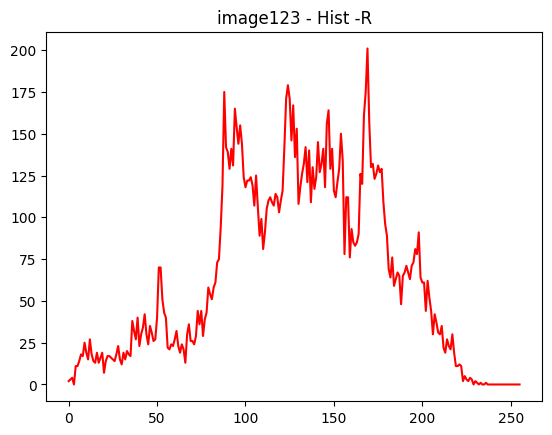

In [33]:
os.chdir(outHist)
for j, image in enumerate(imgs):
    # define colors to plot the histograms
    colors = ('b','g','r')
    hist = list()
    fname = os.path.splitext(file_names[j])[0]

    # compute and plot the image histograms
    for i,color in enumerate(colors):
        hist.append(cv2.calcHist([image],[i],None,[256],[0,256]))

    for i,h in enumerate(hist):
        plt.clf()
        plt.plot(h, colors[i])
        plt.title(fname + " - " + "Hist -" + colors[i].upper())
        plt.savefig(fname + " - " + colors[i].upper() + '.jpg')

os.chdir(dir)

- Corroboramos que nos encontremos en la carpeta raiz del proyecto 

In [34]:
print(os.listdir())
print(os.getcwd())

['Canales', 'Histogramas', 'Imagenes', 'ImagesProcessing.ipynb', 'VideoProcessing.ipynb', 'Videos']
c:\Users\jose_\Desktop\Tesis\Programa


### Procedemos a obtener el histograma en escala de grises

Una vez obtenido el histograma, procedemos a guardarlo en la carpeta Histogramas

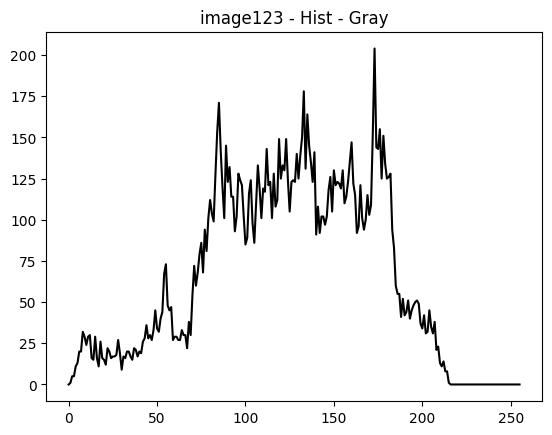

In [35]:
os.chdir(outHist)
for j, image in enumerate(imgs):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    fname = os.path.splitext(file_names[j])[0]

    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    plt.clf()
    plt.plot(hist, 'k')
    plt.title(fname + " - " + "Hist - Gray")
    plt.savefig(fname + " - Gray.jpg")
os.chdir(dir)

# <h1> Aqui iniciamos a separar las imagenes en cada canal B, G, R y Escala de Grises guardandolos en una lista distinta cada uno </h1>

In [13]:
b = list()
g = list()
r = list()
gray = list()

for img in imgs:

    cv2.imshow("Original ",img)

    bI, gI, rI = cv2.split(img)
    grayI = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    b.append(bI)
    g.append(gI)
    r.append(rI) 
    gray.append(grayI)

    cv2.imshow("B-Image", bI)
    
    cv2.imshow("G-Image", gI)
    cv2.imshow("R-Image", rI)
    
    # cv2.imshow("Gray-Image", gray)
    cv2.waitKey(100)
cv2.destroyAllWindows()

# Aqui inician las pruebas con los valores de umbral de cada canal

In [25]:
img = imgs[10]
# cv2.imshow("Image",img)
B = img[:,:,0] # B
G = img[:,:,1] # G
R = img[:,:,2] # R

# Threshold Blue Image
#  60-70, 70-90, 100-110
_, treshB = cv2.threshold(np.hstack([B]), 70, 255, cv2.THRESH_BINARY )
treshB = cv2.resize(treshB,(512,512))
cv2.imshow('Thresh B', treshB)

# # Threshold Green Image
# 100-110, 130-140, 140-150, 170-185
# _, treshG = cv2.threshold(np.hstack([G]), 185, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# treshG = cv2.resize(treshG,(512,512))
# cv2.imshow('Thresh G', treshG)

# Threshold Red Image
# 50-70, 90-110, 130-150, 170-180
# _, treshR = cv2.threshold(np.hstack([R]), 180, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# treshR = cv2.resize(treshR,(512,512))
# cv2.imshow('Thresh R', treshR)


cv2.waitKey(0)
cv2.destroyAllWindows()

# En esta segunda prueba creamos un desenfoque con el fin de obtener mejores resultados

- Primero hacemos un desenfoque con la función GaussianBlur
- Se ejecuta una busqueda de bordes con los valores entre 75 y 80


In [29]:
for img in imgs:
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # dst = cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)

    tresh = cv2.Canny(img, 75, 80)

    # _, treshR = cv2.threshold(np.hstack([dst]), 80, 255, cv2.THRESH_BINARY)
    # treshR = cv2.resize(treshR,(512,512))
    # cv2.imshow('Thresh R', treshR)

    cv2.imshow("Image", np.hstack((img, dst, tresh)))
    cv2.waitKey(400)
cv2.destroyAllWindows()

# Recorremos todas las imagenes implementando una busqueda de bordes con la función Canny con los mismos valores de umbral usados anteriormente

In [18]:
i = 0
for img in imgs:
    img = cv2.resize(img, (512,512))
    # print(i)
    cv2.imshow("RGB-Image", img)
    # b,g,r = cv2.split(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    b[i] = cv2.Canny(b[i], 100, 110) #  60-70, 70-90, 100-110
    g[i] = cv2.Canny(g[i], 140, 150) # 100-110, 130-140, 140-150, 170-185
    r[i] = cv2.Canny(r[i], 130, 150) # 50-70, 90-110, 130-150, 170-180

    # cv2.imshow("BGR-Image", img)
    cv2.imshow("B-Image", b[i])
    
    cv2.imshow("G-Image", g[i])
    cv2.imshow("R-Image", r[i])
    cv2.imshow("Gray-Image", gray)
    cv2.waitKey(100)
    i = i+1
cv2.destroyAllWindows()

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = imgs[10]
img = cv2.resize(img, (512,512))
# GRISES
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.float64(img)

cv2.imshow("Imagen Original", img)
dft = cv2.dft(img)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(dft)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)

# MOSTRAMOS LA IMAGEN
img_frr = np.uint8(255*frr_log/np.max(frr_log))
cv2.imshow("Espectro de Fourier Logaritmica",img_frr)


cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'imgs' is not defined

# <h1> Iniciando la prueba de los filtros con la Transformada de Fourier </h1>

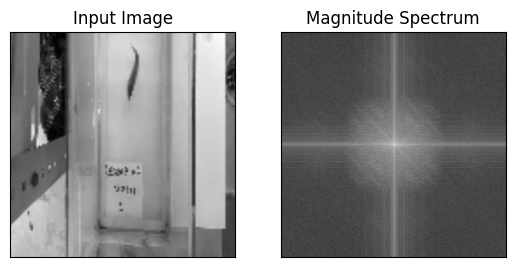

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = imgs[1]
img = cv2.resize(img, (512,512))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

f = np.fft.fft2(img)
# print(f)
fshift = np.fft.fftshift(f)
# print(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))
# print(magnitude_spectrum)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(512, 512)


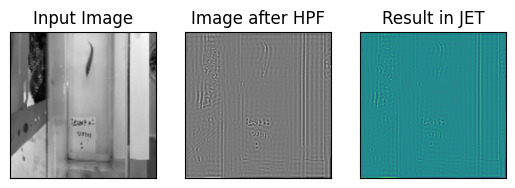

In [ ]:
print(img.shape)
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

# <h1> Pruebas con imagenes recortadas </h1>

In [2]:
"""
Biblioteca:
-   cv2             Manejo de imágenes
-   numpy           Manejo de arreglos de pixeles
(Prueba)-   cv2_imshow      Parche para mostrar imágenes en Colab

-   time            Biblioteca para debuggear
-   matplotlib      Manejo de las impresiones de imagenes
"""
%matplotlib inline

import os
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow

import time 
from matplotlib import pyplot as plt

# Dirección principal
dir = "c:/Users/jose_/Desktop/Tesis/Programa"
# Direccion de guardado de imágenes
outDir = os.getcwd()+"\Imagenes"
# Direccion de carga de videos
inDir = os.getcwd()+"\Videos"
#Dirección de guardado de cada canal
outChan = os.getcwd()+"\Canales"
#Dirección de guardado de los histogramas de cada canal
outHist = os.getcwd()+"\Histogramas"



# Obteniendo las imagenes
global imgs 
global file_names

In [3]:
"""
    Método getImages, el cual nos permite obtener todas las imagenes guardadas en una determinada carpeta
    Entrada: No recibe nada
    Salida: Una lista de imagenes
"""
def getImages(dir):
    dir = dir + "/Prueba"
    print(dir)
    images = list()                                 # Creamos una lista en donde guardaremos temporalmente las imagenes con el fin de no duplicar imagenes
    names = list()
    file_names = os.listdir(dir)                 # Obtenemos el nombre de todos los archivos que se encuentran en la carpeta outDir (Es donde se guardan las imagenes)

    file_names = sorted(file_names, key=lambda s: int(s.split('.')[0][5:])) # Ordenamos los archivos mediante el numero de la imagen

    # Creamos un bucle para cada elemento dentro de la carpeta    
    for file in file_names:
        print(file)
        image_path = dir + "/" + file            # Creamos la variable de la direccion de cada imagen
        image = cv2.imread(image_path)              # Leemos la imagen
        if image is None:                           # Si por alguna cuestion no se puede leer la imagen se descarta
            continue
            
        images.append(image)                        # Agregamos la imagen leida a la lista de imagenes
        names.append(file)

    return images, names                            # Retornamos la lista de imagenes

# Asignamos la lista de imagenes que regresa el metodo getImages a la lista global imgs
imgs, file_names = getImages(outDir)

c:\Users\jose_\Desktop\Tesis\Programa\Imagenes/Prueba
image0000.jpg
image0010.jpg
image0021.jpg
image0039.jpg


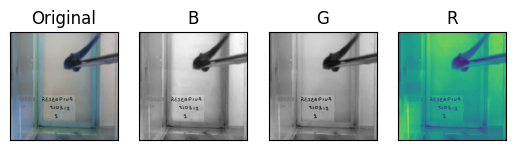

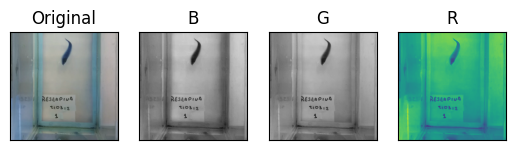

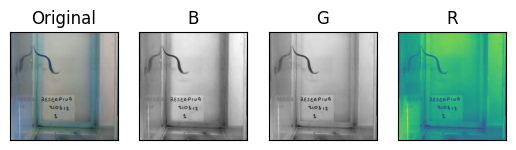

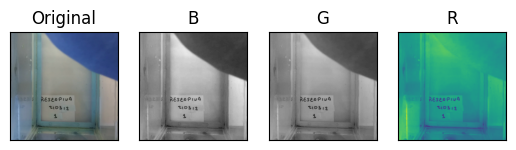

In [4]:
B = list()
G = list()
R = list()
for img in imgs:
    b, g, r = cv2.split(img)
    img = cv2.resize(img, (1080,1080))
    b = cv2.resize(b, (1080, 1080))
    g = cv2.resize(g, (1080, 1080))
    r = cv2.resize(r, (1080, 1080))

    B.append(b)
    G.append(g)
    R.append(R)

    plt.subplot(141),plt.imshow(img, cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(142),plt.imshow(b, cmap = 'gray')
    plt.title('B'), plt.xticks([]), plt.yticks([])
    plt.subplot(143),plt.imshow(g, cmap = 'gray')
    plt.title('G'), plt.xticks([]), plt.yticks([])
    plt.subplot(144),plt.imshow(r)
    plt.title('R'), plt.xticks([]), plt.yticks([])
    plt.show()

In [5]:
print(len(B))
print(len(G))
print(len(R))

4
4
4


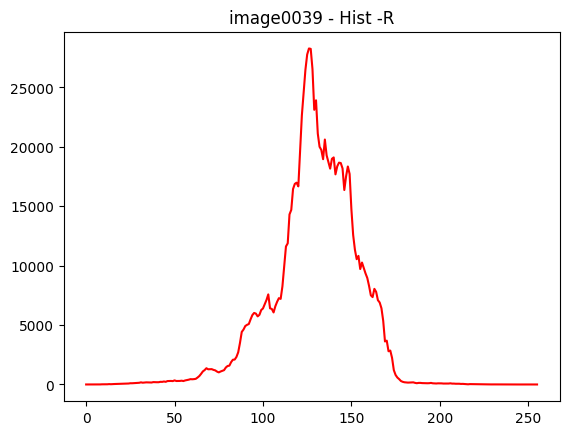

In [45]:
os.mkdir(outHist+"/Prueba")
os.chdir(outHist+"/Prueba")
for j, image in enumerate(imgs):
    # define colors to plot the histograms
    colors = ('b','g','r')
    hist = list()
    fname = os.path.splitext(file_names[j])[0]

    # compute and plot the image histograms
    for i,color in enumerate(colors):
        hist.append(cv2.calcHist([image],[i],None,[256],[0,256]))

    for i,h in enumerate(hist):
        plt.clf()
        plt.plot(h, colors[i])
        plt.title(fname + " - " + "Hist -" + colors[i].upper())
        plt.savefig(fname + " - " + colors[i].upper() + '.jpg')

os.chdir(dir)

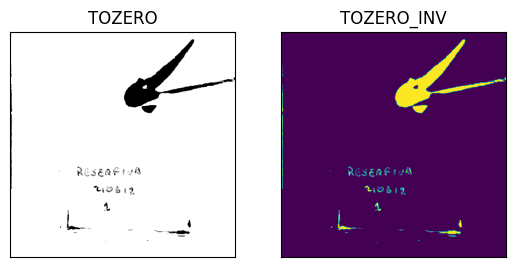

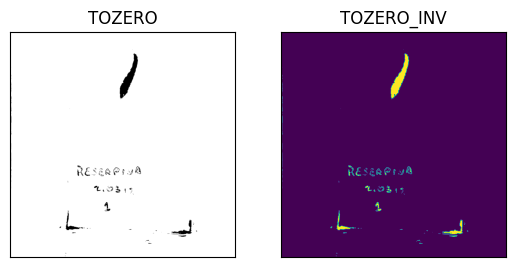

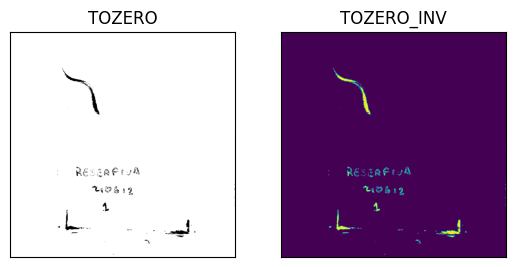

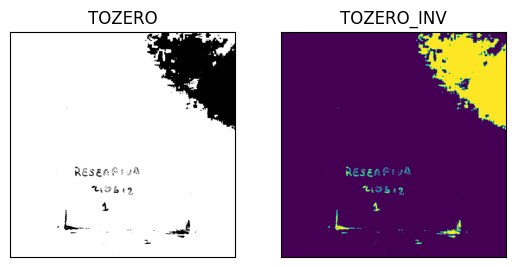

In [14]:
for i in range(0,4,1):
    # Threshold Blue Image
    #  60-70, 70-90, 100-110
    _, treshB = cv2.threshold(B[i], 50, 255, cv2.THRESH_BINARY )
    # cv2.imshow('Thresh B', treshB)

    _, threshB = cv2.threshold(treshB, 70, 255, cv2.THRESH_BINARY_INV)
    # cv2.imshow("THRESH B INV", threshB)

    plt.subplot(121),plt.imshow(treshB, cmap = 'gray')
    plt.title('TOZERO'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(threshB)
    plt.title('TOZERO_INV'), plt.xticks([]), plt.yticks([])
    plt.show()
    # cv2.imshow("Threshold", np.hstack([treshB, threshB]))

    # # Threshold Green Image
    # 100-110, 130-140, 140-150, 170-185
    # _, treshG = cv2.threshold(np.hstack([G]), 185, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # treshG = cv2.resize(treshG,(512,512))
    # cv2.imshow('Thresh G', treshG)

    # Threshold Red Image
    # 50-70, 90-110, 130-150, 170-180
    # _, treshR = cv2.threshold(np.hstack([R]), 180, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # treshR = cv2.resize(treshR,(512,512))
    # cv2.imshow('Thresh R', treshR)


# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Utilizando el filtro Gausiano

In [35]:
for img in imgs:
    img = cv2.resize(img, (512,512))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    dst = cv2.GaussianBlur(img,(11,11),cv2.BORDER_DEFAULT)

    tresh = cv2.Canny(dst, 75, 80)

    # _, treshR = cv2.threshold(np.hstack([dst]), 80, 255, cv2.THRESH_BINARY)
    # treshR = cv2.resize(treshR,(512,512))
    # cv2.imshow('Thresh R', treshR)
    cv2.imshow("Canny ", tresh)

    # cv2.imshow("Image", np.hstack((img, dst, tresh)))
    cv2.waitKey(400)
cv2.destroyAllWindows()